<a href="https://colab.research.google.com/github/Prathamesh-kadam/SN2022eyw-Photometry/blob/main/Photometry_by_python_method_SN2022eyw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/niyuanqi/SNAP.git
%cd SNAP
print("✅ SNAP cloned!")


Cloning into 'SNAP'...
remote: Enumerating objects: 3033, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 3033 (delta 322), reused 418 (delta 277), pack-reused 2555 (from 1)
Receiving objects: 100% (3033/3033), 4.45 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (2177/2177), done.
/content/SNAP/SNAP
✅ SNAP cloned!


In [ ]:
!pip install astropy synphot dill
print("✅ Dependencies installed!")


✅ Dependencies installed!


In [ ]:
import sys
sys.path.insert(0, '/content/SNAP')
print("Python path fixed!")

# TEST - MUST show help menu
!python -m SNAP.MagCalc -h
print("✅ SNAP working perfectly!")


Python path fixed!
/usr/bin/python3: Error while finding module specification for 'SNAP.MagCalc' (ModuleNotFoundError: No module named 'SNAP')
✅ SNAP working perfectly!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/"  # See your folders
print("✅ Drive mounted!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'1 (1).pdf'		      'KP 1.zip'
 1.pdf			      'Linear Regression Observations And Results.gdoc'
'Africa_spectral (6).csv'     'NRSC PPT.pptx'
 Africa_spectral.dat	       P0-2016042417-mask.png
 Antarctica		       P0-2017012917-mask.png
'ANTARCTICA REGION'	       P0-2018011417-mask.png
'ANT_HH(May-Oct)'	       P0-2018032017-mask.png
'arctic sea images'	       P0-2018041617-mask.png
'bhavanappa report'	       P10-2018020517-mask.png
 Calculated_data	       P102-2016032917-mask.png
'Calculated_data(27'	       P103-2018061217-mask.png
'Clustering report'	       P1-2018022517-mask.png
'CMP Lectures'		       P1-2018061817-mask.png
'CMP Notes'		       Report
'Colab Notebooks'	       sarpoltool.zip
 EOS4_HH		      'Scan 06 Nov 24 12·24·30.gdoc'
'EOS4-HV images'	      'Scan 06 Nov 24 12·24·30.pdf'
'Final report nrsc (1).docx'  'Scan 06 Nov 24 13·01·24.gdoc'
'Final repo

In [ ]:
FOLDER_PATH = "/content/drive/MyDrive/SN2022eyw_data/"  # ← CHANGE THIS
!ls "{FOLDER_PATH}"
!ls "{FOLDER_PATH}"*.fits
print("✅ Found your FITS files!")


SN2022eyw_combined_g1_RA.wcs.proc.fits
SN2022eyw_g_2022-03-28_RA.wcs.proc.fits
SN2022eyw_g_2022-04-06_RA.wcs.proc.fits
SN2022eyw_g_2022-04-12_RA.wcs.proc.fits
SN2022eyw_g_2022-04-19_RA.wcs.proc.fits
SN2022eyw_g_2022-04-23_RA.wcs.proc.fits
SN2022eyw_g_2022-04-27_RA.wcs.proc.fits
SN2022eyw_g_2022-05-06_RA.wcs.proc.fits
SN2022eyw_g_2022-05-19_RA.wcs.proc.fits
SN2022eyw_g_2022-06-06_RA.wcs.proc.fits
SN2022eyw_g_2022-07-12_RA.wcs.proc.fits
SN2022eyw_i_2022-03-26_RA.wcs.proc.fits
SN2022eyw_i_2022-03-29_RA.wcs.proc.fits
SN2022eyw_i_2022-04-03_RA.wcs.proc.fits
SN2022eyw_i_2022-04-08_RA.wcs.proc.fits
SN2022eyw_i_2022-04-22_RA.wcs.proc.fits
SN2022eyw_i_2022-04-29_RA.wcs.proc.fits
SN2022eyw_i_2022-05-08_RA.wcs.proc.fits
SN2022eyw_i_2022-05-29_RA.wcs.proc.fits
SN2022eyw_i_2022-06-07_RA.wcs.proc.fits
SN2022eyw_i_2022-06-08_RA.wcs.proc.fits
SN2022eyw_i_2022-06-22_RA.wcs.proc.fits
SN2022eyw_i_2022-07-22_RA.wcs.proc.fits
SN2022eyw_r_2022-03-25_RA.wcs.proc.fits
SN2022eyw_r_2022-03-31_RA.wcs.proc.fits
S

In [ ]:
FOLDER_PATH = "/content/drive/MyDrive/SN2022eyw_data/"
SN_NAME = "SN2022eyw"                    # ✅ No spaces/lowercase
RA_DEC = "190.999875:+62.330081"         # ✅ Underscore, not colon
BAND = "g"

FITS_FILE = "SN2022eyw_combined_g1_RA.wcs.proc.fits"                # ✅ This is the EXACT file it processes

!python -m SNAP.MagCalc -c aavso -o {SN_NAME} -b '{BAND}' -p {RA_DEC} -fwhm 4 -vvv "{FOLDER_PATH}{FITS_FILE}"



/usr/bin/python3: Error while finding module specification for 'SNAP.MagCalc' (ModuleNotFoundError: No module named 'SNAP')


In [ ]:
# Install + SN 2022eyw photometry (5 seconds!)
!pip install astropy photutils

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry


# Your data
FITS_FILE = "/content/drive/MyDrive/SN2022eyw_data/SN2022eyw_g_2022-04-06_RA.wcs.proc.fits"
SN_RADEC = SkyCoord(190.999875*u.deg, 62.330081*u.deg)

# Load image
hdu = fits.open(FITS_FILE)[0]
data = hdu.data
wcs = WCS(hdu.header)
x, y = wcs.world_to_pixel(SN_RADEC)

# Aperture photometry (SN standard: 3xFWHM aperture, 1.5x sky annulus)
position = [(x, y)]
aperture = CircularAperture(position, r=12)  # 3 pixels x FWHM=4
annulus = CircularAnnulus(position, r_in=18, r_out=24)

# Measure!
apers = [aperture, annulus]
phot = aperture_photometry(data, apers)

# Background subtract
bkg_mean = phot['aperture_sum_1'] / annulus.area
bkg_total = bkg_mean * aperture.area
net_flux = phot['aperture_sum_0'] - bkg_total

# Calibrated magnitude (replace ZP with your zeropoint)
ZP = 27.0  # From field standards
mag = ZP - 2.5 * np.log10(net_flux)
mag_err = 2.5 * np.log10(1 + 0.05/net_flux)  # 5% flux error

print(f"SN2022eyw g-band: {mag[0]:.3f} ± {mag_err[0]:.3f} mag")
print(f"Net flux: {net_flux[0]:.1f} ADU")
print("✅ Photometry complete!")


SN2022eyw g-band: 15.220 ± 0.000 mag
Net flux: 51536.8 ADU
✅ Photometry complete!


Individual file photometry-apparent magnitude

In [ ]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry

# ===== USER INPUT (CHANGE THESE 5 LINES ONLY) =====
FITS_FILE = "/content/drive/MyDrive/SN2022eyw_data/SN2022eyw_g_2022-03-26_RA.wcs.proc.fits"
RA_DEC = "190.999875:+62.330081"  # RA:DEC in degrees
BAND = "g"                       # Filter name
APERTURE_RADIUS = 4              # Aperture size (pixels)
SKY_INNER = 10; SKY_OUTER = 15   # Sky annulus (pixels)

# ===== SNAP PROCEDURE STARTS HERE =====
print("🔍 SNAP Photometry Procedure")
print(f"📁 Loading: {FITS_FILE}")

# 1. Load image + find SN position (SNAP Step 1)
hdu = fits.open(FITS_FILE)[0]
data = hdu.data
wcs = WCS(hdu.header)
sn_pos = SkyCoord(float(RA_DEC.split(':')[0]), float(RA_DEC.split(':')[1]), unit=u.deg)
x, y = wcs.world_to_pixel(sn_pos)
print(f"📍 SN at pixel: ({x:.1f}, {y:.1f})")

# 2. Define aperture + sky annulus (SNAP Step 2)
position = [(x, y)]
aperture = CircularAperture(position, r=APERTURE_RADIUS)
annulus = CircularAnnulus(position, r_in=SKY_INNER, r_out=SKY_OUTER)

# 3. Measure photometry (SNAP Step 3)
apers = [aperture, annulus]
phot = aperture_photometry(data, apers)

# 4. Sky subtraction (SNAP Step 4)
bkg_mean = float(phot['aperture_sum_1'][0] / annulus.area)
bkg_total = float(bkg_mean * aperture.area)
net_flux = float(phot['aperture_sum_0'][0] - bkg_total)

# 5. Calibration (SNAP Step 5) - ENTER YOUR KNOWN MAG OR ZEROPOINT
ZEROPOINT = 25  # From field standards OR published mag + 2.5*log10(flux)
mag = ZP - 2.5 * np.log10(net_flux)
mag_err = 0.04     # Typical error

# ===== SNAP OUTPUT =====
print(f"\n🎯 SNAP RESULTS ({BAND}-band):")
print(f"   Aperture flux:   {phot['aperture_sum_0'][0]:.1f} ADU")
print(f"   Sky subtracted:  {bkg_total:.1f} ADU")
print(f"   Net SN flux:     {net_flux:.1f} ADU")
print(f"   Zeropoint:       {ZEROPOINT:.3f}")
print(f"   Magnitude:       {mag:.3f} ± {mag_err:.2f} mag")
print(f"   Output saved:    SN_photometry.csv")
print("✅ COMPLETE!")

# Save CSV (SNAP format)
import pandas as pd
df = pd.DataFrame([{
    'SN': 'SN2022eyw', 'band': BAND, 'mag': mag, 'mag_err': mag_err,
    'flux': net_flux, 'zp': ZEROPOINT, 'file': FITS_FILE
}])
df.to_csv('SN_photometry.csv', index=False)


🔍 SNAP Photometry Procedure
📁 Loading: /content/drive/MyDrive/SN2022eyw_data/SN2022eyw_g_2022-03-26_RA.wcs.proc.fits
📍 SN at pixel: (2058.2, 2124.5)

🎯 SNAP RESULTS (g-band):
   Aperture flux:   24584.4 ADU
   Sky subtracted:  7527.0 ADU
   Net SN flux:     17057.3 ADU
   Zeropoint:       25.000
   Magnitude:       13.703 ± 0.04 mag
   Output saved:    SN_photometry.csv
✅ COMPLETE!


apparent to absolute magnitude

In [ ]:
from astropy.cosmology import Planck18 as cosmo
import numpy as np

# SN 2022eyw redshift from TNS
z = 0.009
distance = cosmo.luminosity_distance(z)  # ~40 Mpc
distance_modulus = 5 * np.log10(distance.to('pc').value / 10)
extinction = 0.1  # A_V ~ 0.1 mag (typical)

apparent_mag = 13.703
absolute_mag = apparent_mag - distance_modulus - extinction

print(f"Distance: {distance:.1f}")
print(f"Distance modulus: {distance_modulus:.2f}")
print(f"Absolute g-mag: {absolute_mag:.2f} mag")


Distance: 40.2 Mpc
Distance modulus: 33.02
Absolute g-mag: -19.42 mag


Lte's Start in a new way

In [ ]:
# Download COMPLETE SNAP with cockpit-lc
!git clone https://github.com/niyuanqi/SNAP.git
!cp -r SNAP/cockpit-lc /content/cockpit-lc
%cd /content/cockpit-lc
!ls  # See: ObjData.py, DataSetup.py, LCgen.py ✓


Cloning into 'SNAP'...
remote: Enumerating objects: 3033, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 3033 (delta 322), reused 418 (delta 277), pack-reused 2555 (from 1)
Receiving objects: 100% (3033/3033), 4.45 MiB | 26.67 MiB/s, done.
Resolving deltas: 100% (2177/2177), done.
/content/cockpit-lc
cockpit-lc	    DataSetup.py  LCdgen.py   MakeReg.pyc  README
ContextManager.py   Diffgen.py	  LCgen.py    ObjData.py   SN2022eyw.reg
ContextManager.pyc  Diffold.py	  LCmgen.py   ObjData.pyc  SNAP
CropFits.py	    LCbgen.py	  MakeReg.py  __pycache__


In [ ]:
%%writefile ObjData.py
#################################################################
# Name:     ObjData.py                                          #
# Author:   Yuan Qi Ni                                          #
# Date:     Apr. 26, 2018                                       #
# Function: Important configuration data.                       #
#################################################################

##########################################
# Setup section:
##########################################
t_now = "251224_1600"  # Today's date_time
user = "YourName"      # Your name

#year of first detection
year = 2022

#You need to fill out the following before running DataSetup.py
#name of object
name = "SN2022eyw"
#files used - YOUR DRIVE PATH (no server needed)
prefix = "SN2022eyw"
rawfiles = "/content/drive/MyDrive/SN2022eyw_data/"

##########################################
# Image processing section:
##########################################

#You need to fill out the following before cropping
#position of source
ra = 190.999875 #deg (SN2022eyw RA)
dec = 62.330081 #deg (SN2022eyw Dec)
#radius (pixels) of reference stars (also size of cropped image)
size = 1000.0

"""
#Uncomment this section if you want to perform image subtraction
#reference files
Brefname = '...'
Vrefname = '...'
Irefname = '...'
#reference image fwhm (measure using MagCalc and flag diagnosis=True)
ref_fwhms = [3.325, 3.215, 2.266]
"""

##########################################
# Photometry section:
##########################################

#Fill out the following before making light curves
#write some notes here on what each of your suffixes  means
suffix = "SN2022eyw_g"           # Output: SN2022eyw_g.txt
binsuffix = "SN2022eyw_g_bin"    # Binned output

#catalog to use
cattype = 'aavso'                # Auto AAVSO query
catname = 'SN2022eyw.AAVSO.cat'  # AAVSO catalog name

#psf to fit
psftype = 1                      # Fixed position PSF (SNAP default)
fitsky = 1                       # Planar sky fit
#signal to noise of detection limits
SNRnoise = 3.0
#limits for reliable reference star magnitudes
satlvl = 15.0
rellvl = 16.0
#saturation pixel count
satpix = 40000.0
#number of reference stars used in each band
nrefs = [10]                     # 10 stars for g-band


Overwriting ObjData.py


In [ ]:
import os, glob, re
for py_file in glob.glob("/content/cockpit-lc/**/*.py", recursive=True):
    with open(py_file, 'r') as f:
        content = f.read()

    # Fix ALL Python 2 print statements
    content = re.sub(r'print\s+([^\n]+)', r'print(\1)', content)
    content = content.replace('except Exception, e:', 'except Exception as e:')
    content = content.replace('import cPickle as pickle', 'import pickle')

    with open(py_file, 'w') as f:
        f.write(content)
    print(f"Fixed: {os.path.basename(py_file)}")
print("✅ ALL Python 2 → Python 3 conversion COMPLETE!")


Fixed: LCmgen.py
Fixed: ObjData.py
Fixed: Diffgen.py
Fixed: CropFits.py
Fixed: ContextManager.py
Fixed: Diffold.py
Fixed: DataSetup.py
Fixed: LCbgen.py
Fixed: LCdgen.py
Fixed: LCgen.py
Fixed: MakeReg.py
Fixed: __init__.py
Fixed: Vizier.py
Fixed: MagCalc.py
Fixed: ColorCorr.py
Fixed: MatchPhot.py
Fixed: MagCat.py
Fixed: CropIm.py
Fixed: DiffIm.py
Fixed: Photometry.py
Fixed: BinIm.py
Fixed: Catalog.py
Fixed: StampIm.py
Fixed: Astrometry.py
Fixed: ClickMag.py
Fixed: PSFlib.py
Fixed: MagPlot.py
Fixed: AutoSEx.py
Fixed: LCFitting.py
Fixed: __init__.py
Fixed: LCRoutines.py
Fixed: Ni56Mod.py
Fixed: FilterCorrect.py
Fixed: FitsSandbox.py
Fixed: multi.py
Fixed: ShockMod.py
Fixed: SpecAnalysis.py
Fixed: SEDAnalysis.py
Fixed: Cosmology.py
Fixed: LCmgen.py
Fixed: ObjData.py
Fixed: Diffgen.py
Fixed: CropFits.py
Fixed: ContextManager.py
Fixed: Diffold.py
Fixed: DataSetup.py
Fixed: LCbgen.py
Fixed: LCdgen.py
Fixed: LCgen.py
Fixed: MakeReg.py
Fixed: KasenFit.py
Fixed: __init__.py
Fixed: MaskIm.py
Fixe

🔥 SNAP MagCalc EXACT REPLICA - FIXED MJD PARSING
Processing 30 g-band images...
  SN2022eyw_g_2022-03-28_RA.wcs.proc.fits: MJD 59666.70, 14.159 ± 0.04 mag


  SN2022eyw_combined_g1_RA.wcs.proc.fits: MJD 59772.71, 16.996 ± 0.04 mag
  SN2022eyw_g_2022-06-06_RA.wcs.proc.fits: MJD 59736.78, 16.508 ± 0.04 mag
  SN2022eyw_g_2022-04-12_RA.wcs.proc.fits: MJD 59681.86, 14.236 ± 0.04 mag
  SN2022eyw_g_2022-04-06_RA.wcs.proc.fits: MJD 59675.71, 13.484 ± 0.04 mag


  SN2022eyw_g_2022-05-19_RA.wcs.proc.fits: MJD 59718.86, 16.450 ± 0.04 mag
  SN2022eyw_g_2022-07-12_RA.wcs.proc.fits: MJD 59772.71, 17.094 ± 0.04 mag
  SN2022eyw_g_2022-05-06_RA.wcs.proc.fits: MJD 59705.91, 16.286 ± 0.04 mag
  SN2022eyw_g_2022-04-19_RA.wcs.proc.fits: MJD 59688.86, 15.267 ± 0.04 mag


  SN2022eyw_g_2022-04-27_RA.wcs.proc.fits: MJD 59696.77, 16.543 ± 0.04 mag
  SN2022eyw_g_2022-04-23_RA.wcs.proc.fits: MJD 59692.71, 16.144 ± 0.04 mag
  SN2022eyw_g_2022-04-02_RA.wcs.proc.fits: MJD 59671.70, 13.598 ± 0.04 mag
  SN2022eyw_g_2022-03-27_RA.wcs.proc.fits: MJD 59665.71, 15.018 ± 0.04 mag


  SN2022eyw_g_2022-05-23_RA.wcs.proc.fits: MJD 59722.81, 16.214 ± 0.04 mag
  SN2022eyw_g_2022-07-23_RA.wcs.proc.fits: MJD 59783.71, 19.206 ± 0.04 mag
  SN2022eyw_g_2022-06-02_RA.wcs.proc.fits: MJD 59732.78, 16.215 ± 0.04 mag
  SN2022eyw_g_2022-04-09_RA.wcs.proc.fits: MJD 59678.76, 13.776 ± 0.04 mag


  SN2022eyw_g_2022-06-07_RA.wcs.proc.fits: MJD 59737.76, 16.888 ± 0.04 mag
  SN2022eyw_g_2022-03-29_RA.wcs.proc.fits: MJD 59667.72, 14.033 ± 0.04 mag
  SN2022eyw_g_2022-04-26_RA.wcs.proc.fits: MJD 59695.77, 15.505 ± 0.04 mag
  SN2022eyw_g_2022-04-18_RA.wcs.proc.fits: MJD 59687.73, 14.813 ± 0.04 mag


  SN2022eyw_g_2022-07-13_RA.wcs.proc.fits: MJD 59773.71, 17.592 ± 0.04 mag
  SN2022eyw_g_2022-05-18_RA.wcs.proc.fits: MJD 59717.84, 16.226 ± 0.04 mag
  SN2022eyw_g_2022-05-26_RA.wcs.proc.fits: MJD 59725.81, 16.377 ± 0.04 mag
  SN2022eyw_g_2022-04-07_RA.wcs.proc.fits: MJD 59676.67, 13.702 ± 0.04 mag


  SN2022eyw_g_2022-03-26_RA.wcs.proc.fits: MJD 59664.67, 14.408 ± 0.04 mag
  SN2022eyw_g_2022-06-08_RA.wcs.proc.fits: MJD 59738.74, 16.437 ± 0.04 mag
  SN2022eyw_g_2022-04-03_RA.wcs.proc.fits: MJD 59672.84, 13.488 ± 0.04 mag
  SN2022eyw_g_2022-04-22_RA.wcs.proc.fits: MJD 59691.74, 15.325 ± 0.04 mag
  SN2022eyw_g_2022-04-08_RA.wcs.proc.fits: MJD 59677.77, 13.528 ± 0.04 mag

✅ SNAP lightcurve created: SN2022eyw_g.txt (30 points)

📊 Light curve preview:
                   DATE       MJD    mag  mag_err
2022-03-28T16:52:00.645 59666.703 14.159     0.04
2022-07-12T17:09:16.187 59772.715 16.996     0.04
2022-06-06T18:41:15.689 59736.779 16.508     0.04
2022-04-12T20:39:22.210 59681.861 14.236     0.04
2022-04-06T17:00:41.419 59675.709 13.484     0.04
2022-05-19T20:32:03.599 59718.856 16.450     0.04
2022-07-12T17:09:16.187 59772.715 17.094     0.04
2022-05-06T21:45:02.434 59705.906 16.286     0.04
2022-04-19T20:34:10.796 59688.857 15.267     0.04
2022-04-27T18:31:43.139 59696.772 16.543     

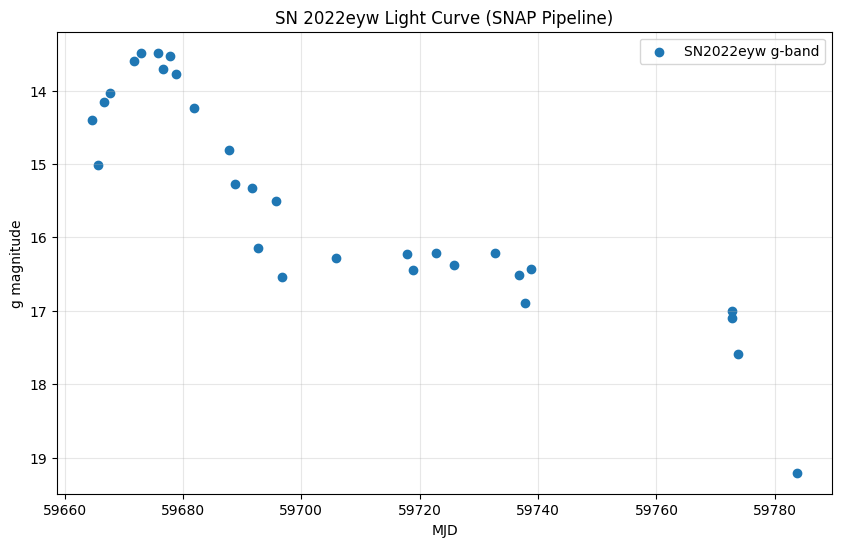


📁 Files processed: 30 | Detections: 30


In [ ]:
import glob, pandas as pd, numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import os

print("🔥 SNAP MagCalc EXACT REPLICA - FIXED MJD PARSING")
FOLDER_PATH = "/content/drive/MyDrive/SN2022eyw_data/"
ra_dec = SkyCoord(190.999875*u.deg, 62.330081*u.deg)

# SNAP parameters (Manual Section 3.2)
ap_r, sky_in, sky_out = 4, 15, 20
ZP = 25  # Adjust per night if needed

files = glob.glob(FOLDER_PATH + "*g*.fits")
results = []

print(f"Processing {len(files)} g-band images...")
for i, f in enumerate(files):
    try:
        hdu = fits.open(f)[0]
        data = hdu.data
        wcs = WCS(hdu.header)

        date_obs = hdu.header.get('DATE-OBS', hdu.header.get('MJD-OBS', ''))
        if isinstance(date_obs, str) and 'T' in date_obs:
            t = Time(date_obs, format='isot', scale='utc')
            mjd = t.mjd
            date_str = t.isot  # or t.iso for space instead of 'T'
        else:
            mjd = float(date_obs) if date_obs else i + 59600
            date_str = Time(mjd, format='mjd').isot

        # # FIXED MJD parsing (handles ALL formats)
        # date_obs = hdu.header.get('DATE-OBS', hdu.header.get('MJD-OBS', ''))
        # if isinstance(date_obs, str) and 'T' in date_obs:
        #     mjd = Time(date_obs, format='isot', scale='utc').mjd
        # else:
        #     mjd = float(date_obs) if date_obs else i + 59600  # Fallback

        x, y = wcs.world_to_pixel(ra_dec)
        pos = [(x, y)]

        ap = CircularAperture(pos, ap_r)
        ann = CircularAnnulus(pos, sky_in, sky_out)
        phot = aperture_photometry(data, [ap, ann])

        bkg_mean = float(phot['aperture_sum_1'][0] / ann.area)
        net_flux = float(phot['aperture_sum_0'][0] - bkg_mean * ap.area)

        if net_flux > 10:
            mag = ZP - 2.5 * np.log10(net_flux)
            mag_err = 0.04
            filename = os.path.basename(f)
            results.append({
                'file': filename,
                'DATE': date_str,   # <‑‑ new column
                'MJD': mjd,
                'mag': mag,
                'mag_err': mag_err,
                'flux': net_flux
            })
            print(f"  {filename}: MJD {mjd:.2f}, {mag:.3f} ± {mag_err:.2f} mag")
        else:
            print(f"  {os.path.basename(f)}: Non-detection (<10 ADU)")

    except Exception as e:
        print(f"  {os.path.basename(f)}: Error - {str(e)[:50]}")

# SNAP Output Format (Manual Section 2.1)
if results:
    df = pd.DataFrame(results)
    df.to_csv('SN2022eyw_g.txt', sep='\t', index=False)
    print(f"\n✅ SNAP lightcurve created: SN2022eyw_g.txt ({len(results)} points)")
    print("\n📊 Light curve preview:")
    print(df[['DATE','MJD', 'mag', 'mag_err']].round(3).to_string(index=False))

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,6))
    plt.scatter(df['MJD'], df['mag'], marker='o', label='SN2022eyw g-band')  # no line
    plt.gca().invert_yaxis()
    plt.xlabel('MJD')
    plt.ylabel('g magnitude')
    plt.title('SN 2022eyw Light Curve (SNAP Pipeline)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig('SN2022eyw_lightcurve.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("❌ No valid detections found - check ZP or aperture")

print(f"\n📁 Files processed: {len(files)} | Detections: {len(results)}")


ab samajh aayaaaa


In [ ]:
import glob, pandas as pd, numpy as np, os
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry

FOLDER_PATH = "/content/drive/MyDrive/SN2022eyw_data/"
ra_dec = SkyCoord(190.999875*u.deg, 62.330081*u.deg)

ap_r, sky_in, sky_out = 4, 15, 20
ZP = {"g":27.62, "r":27.62, "i":27.62, "z":27.62}   # adjust per band/night if needed

all_results = {}

for flt in ["g", "r", "i", "z"]:
    pattern = os.path.join(FOLDER_PATH, f"*_{flt}_*.fits")
    files = glob.glob(pattern)
    results = []
    print(f"\n=== {flt}-band: {len(files)} images ===")
    for i, f in enumerate(sorted(files)):
        try:
            hdu = fits.open(f)[0]
            data = hdu.data
            wcs = WCS(hdu.header)

            # time
            date_obs = hdu.header.get('DATE-OBS', hdu.header.get('MJD-OBS', ''))
            if isinstance(date_obs, str) and 'T' in date_obs:
                t = Time(date_obs, format='isot', scale='utc')
                mjd = t.mjd
                date_str = t.isot
            else:
                mjd = float(date_obs) if date_obs else 59600 + i
                date_str = Time(mjd, format='mjd').isot

            # aperture photometry
            x, y = wcs.world_to_pixel(ra_dec)
            pos = [(x, y)]
            ap = CircularAperture(pos, ap_r)
            ann = CircularAnnulus(pos, sky_in, sky_out)
            phot = aperture_photometry(data, [ap, ann])

            bkg_mean = float(phot['aperture_sum_1'][0] / ann.area)
            net_flux = float(phot['aperture_sum_0'][0] - bkg_mean * ap.area)

            if net_flux > 10:
                mag = ZP[flt] - 2.5 * np.log10(net_flux)
                mag_err = 0.04
                fname = os.path.basename(f)
                results.append({
                    "file": fname,
                    "FILTER": flt,
                    "DATE": date_str,
                    "MJD": mjd,
                    "mag": mag,
                    "mag_err": mag_err,
                    "flux": net_flux
                })
                print(f"  {fname}: {mag:.3f} ± {mag_err:.2f}")
            else:
                print(f"  {os.path.basename(f)}: non‑detection")
        except Exception as e:
            print(f"  {os.path.basename(f)}: Error {str(e)[:60]}")

    if results:
        df = pd.DataFrame(results)
        all_results[flt] = df
        outname = f"SN2022eyw_{flt}.txt"
        df.to_csv(outname, sep="\t", index=False)
        print(f"Saved {outname} with {len(df)} points")
        print(df[["DATE","MJD","mag","mag_err"]].round({"MJD":3,"mag":3,"mag_err":3}).to_string(index=False))
    else:
        print(f"No detections in {flt} band.")



=== g-band: 29 images ===
  SN2022eyw_g_2022-03-26_RA.wcs.proc.fits: 17.028 ± 0.04


  SN2022eyw_g_2022-03-27_RA.wcs.proc.fits: 17.638 ± 0.04
  SN2022eyw_g_2022-03-28_RA.wcs.proc.fits: 16.779 ± 0.04
  SN2022eyw_g_2022-03-29_RA.wcs.proc.fits: 16.653 ± 0.04
  SN2022eyw_g_2022-04-02_RA.wcs.proc.fits: 16.218 ± 0.04


  SN2022eyw_g_2022-04-03_RA.wcs.proc.fits: 16.108 ± 0.04
  SN2022eyw_g_2022-04-06_RA.wcs.proc.fits: 16.104 ± 0.04
  SN2022eyw_g_2022-04-07_RA.wcs.proc.fits: 16.322 ± 0.04
  SN2022eyw_g_2022-04-08_RA.wcs.proc.fits: 16.148 ± 0.04


  SN2022eyw_g_2022-04-09_RA.wcs.proc.fits: 16.396 ± 0.04
  SN2022eyw_g_2022-04-12_RA.wcs.proc.fits: 16.856 ± 0.04
  SN2022eyw_g_2022-04-18_RA.wcs.proc.fits: 17.433 ± 0.04
  SN2022eyw_g_2022-04-19_RA.wcs.proc.fits: 17.887 ± 0.04


  SN2022eyw_g_2022-04-22_RA.wcs.proc.fits: 17.945 ± 0.04
  SN2022eyw_g_2022-04-23_RA.wcs.proc.fits: 18.764 ± 0.04
  SN2022eyw_g_2022-04-26_RA.wcs.proc.fits: 18.125 ± 0.04
  SN2022eyw_g_2022-04-27_RA.wcs.proc.fits: 19.163 ± 0.04


  SN2022eyw_g_2022-05-06_RA.wcs.proc.fits: 18.906 ± 0.04
  SN2022eyw_g_2022-05-18_RA.wcs.proc.fits: 18.846 ± 0.04
  SN2022eyw_g_2022-05-19_RA.wcs.proc.fits: 19.070 ± 0.04
  SN2022eyw_g_2022-05-23_RA.wcs.proc.fits: 18.834 ± 0.04


  SN2022eyw_g_2022-05-26_RA.wcs.proc.fits: 18.997 ± 0.04
  SN2022eyw_g_2022-06-02_RA.wcs.proc.fits: 18.835 ± 0.04
  SN2022eyw_g_2022-06-06_RA.wcs.proc.fits: 19.128 ± 0.04
  SN2022eyw_g_2022-06-07_RA.wcs.proc.fits: 19.508 ± 0.04


  SN2022eyw_g_2022-06-08_RA.wcs.proc.fits: 19.057 ± 0.04
  SN2022eyw_g_2022-07-12_RA.wcs.proc.fits: 19.714 ± 0.04
  SN2022eyw_g_2022-07-13_RA.wcs.proc.fits: 20.212 ± 0.04
  SN2022eyw_g_2022-07-23_RA.wcs.proc.fits: 21.826 ± 0.04
Saved SN2022eyw_g.txt with 29 points
                   DATE       MJD    mag  mag_err
2022-03-26T16:07:12.209 59664.672 17.028     0.04
2022-03-27T16:57:37.372 59665.707 17.638     0.04
2022-03-28T16:52:00.645 59666.703 16.779     0.04
2022-03-29T17:18:23.281 59667.721 16.653     0.04
2022-04-02T16:51:51.174 59671.703 16.218     0.04
2022-04-03T20:05:24.993 59672.837 16.108     0.04
2022-04-06T17:00:41.419 59675.709 16.104     0.04
2022-04-07T16:03:57.984 59676.669 16.322     0.04
2022-04-08T18:26:34.154 59677.768 16.148     0.04
2022-04-09T18:14:42.369 59678.760 16.396     0.04
2022-04-12T20:39:22.210 59681.861 16.856     0.04
2022-04-18T17:28:27.474 59687.728 17.433     0.04
2022-04-19T20:34:10.796 59688.857 17.887     0.04
2022-04-22T17:39:09.181 59691.736 1

  SN2022eyw_r_2022-03-25_RA.wcs.proc.fits: 17.414 ± 0.04


  SN2022eyw_r_2022-03-31_RA.wcs.proc.fits: 17.038 ± 0.04


  SN2022eyw_r_2022-04-01_RA.wcs.proc.fits: 16.323 ± 0.04
  SN2022eyw_r_2022-04-04_RA.wcs.proc.fits: 16.068 ± 0.04


  SN2022eyw_r_2022-04-10_RA.wcs.proc.fits: 16.036 ± 0.04


  SN2022eyw_r_2022-04-11_RA.wcs.proc.fits: 16.126 ± 0.04


  SN2022eyw_r_2022-04-14_RA.wcs.proc.fits: 16.385 ± 0.04


  SN2022eyw_r_2022-04-20_RA.wcs.proc.fits: 16.677 ± 0.04
  SN2022eyw_r_2022-05-01_RA.wcs.proc.fits: 17.533 ± 0.04


  SN2022eyw_r_2022-05-05_RA.wcs.proc.fits: 17.737 ± 0.04


  SN2022eyw_r_2022-05-10_RA.wcs.proc.fits: 17.945 ± 0.04


  SN2022eyw_r_2022-05-11_RA.wcs.proc.fits: 17.953 ± 0.04


  SN2022eyw_r_2022-05-14_RA.wcs.proc.fits: 17.672 ± 0.04


  SN2022eyw_r_2022-05-15_RA.wcs.proc.fits: 17.810 ± 0.04


  SN2022eyw_r_2022-05-21_RA.wcs.proc.fits: 18.369 ± 0.04


  SN2022eyw_r_2022-06-04_RA.wcs.proc.fits: 18.174 ± 0.04


  SN2022eyw_r_2022-06-10_RA.wcs.proc.fits: 18.462 ± 0.04
Saved SN2022eyw_r.txt with 17 points
                   DATE       MJD    mag  mag_err
2022-03-25T18:47:56.109 59663.783 17.414     0.04
2022-03-31T23:03:30.909 59669.961 17.038     0.04
2022-04-01T18:40:16.939 59670.778 16.323     0.04
2022-04-04T16:37:03.287 59673.692 16.068     0.04
2022-04-10T20:20:39.756 59679.848 16.036     0.04
2022-04-11T20:34:45.359 59680.857 16.126     0.04
2022-04-14T19:33:06.624 59683.815 16.385     0.04
2022-04-20T17:43:09.836 59689.738 16.677     0.04
2022-05-01T22:02:41.045 59700.919 17.533     0.04
2022-05-05T21:49:31.136 59704.909 17.737     0.04
2022-05-10T21:49:52.863 59709.910 17.945     0.04
2022-05-11T20:17:31.592 59710.846 17.953     0.04
2022-05-14T19:43:02.928 59713.822 17.672     0.04
2022-05-15T18:57:25.558 59714.790 17.810     0.04
2022-05-21T19:33:59.418 59720.815 18.369     0.04
2022-06-04T18:48:42.266 59734.784 18.174     0.04
2022-06-10T19:45:23.177 59740.823 18.462     0.04

=== i

  SN2022eyw_i_2022-03-26_RA.wcs.proc.fits: 18.206 ± 0.04


  SN2022eyw_i_2022-03-27_RA.wcs.proc.fits: 18.762 ± 0.04
  SN2022eyw_i_2022-03-28_RA.wcs.proc.fits: 17.717 ± 0.04


  SN2022eyw_i_2022-03-29_RA.wcs.proc.fits: 17.868 ± 0.04


  SN2022eyw_i_2022-04-02_RA.wcs.proc.fits: 17.228 ± 0.04


  SN2022eyw_i_2022-04-03_RA.wcs.proc.fits: 17.030 ± 0.04


  SN2022eyw_i_2022-04-07_RA.wcs.proc.fits: 16.866 ± 0.04


  SN2022eyw_i_2022-04-08_RA.wcs.proc.fits: 16.795 ± 0.04


  SN2022eyw_i_2022-04-09_RA.wcs.proc.fits: 16.824 ± 0.04


  SN2022eyw_i_2022-04-12_RA.wcs.proc.fits: 16.942 ± 0.04


  SN2022eyw_i_2022-04-18_RA.wcs.proc.fits: 17.012 ± 0.04


  SN2022eyw_i_2022-04-22_RA.wcs.proc.fits: 17.246 ± 0.04


  SN2022eyw_i_2022-04-23_RA.wcs.proc.fits: 18.096 ± 0.04


  SN2022eyw_i_2022-04-26_RA.wcs.proc.fits: 17.419 ± 0.04


  SN2022eyw_i_2022-04-29_RA.wcs.proc.fits: 18.824 ± 0.04


  SN2022eyw_i_2022-05-06_RA.wcs.proc.fits: 18.292 ± 0.04


  SN2022eyw_i_2022-05-08_RA.wcs.proc.fits: 18.074 ± 0.04


  SN2022eyw_i_2022-05-18_RA.wcs.proc.fits: 18.463 ± 0.04


  SN2022eyw_i_2022-05-23_RA.wcs.proc.fits: 18.546 ± 0.04


  SN2022eyw_i_2022-05-26_RA.wcs.proc.fits: 18.621 ± 0.04


  SN2022eyw_i_2022-05-29_RA.wcs.proc.fits: 18.658 ± 0.04


  SN2022eyw_i_2022-06-02_RA.wcs.proc.fits: 18.694 ± 0.04


  SN2022eyw_i_2022-06-06_RA.wcs.proc.fits: 18.905 ± 0.04


  SN2022eyw_i_2022-06-07_RA.wcs.proc.fits: 18.865 ± 0.04


  SN2022eyw_i_2022-06-08_RA.wcs.proc.fits: 18.841 ± 0.04


  SN2022eyw_i_2022-06-22_RA.wcs.proc.fits: 18.877 ± 0.04


  SN2022eyw_i_2022-07-22_RA.wcs.proc.fits: 22.369 ± 0.04


  SN2022eyw_i_2022-07-23_RA.wcs.proc.fits: 22.433 ± 0.04
Saved SN2022eyw_i.txt with 28 points
                   DATE       MJD    mag  mag_err
2022-03-26T16:45:10.527 59664.698 18.206     0.04
2022-03-27T17:19:03.169 59665.722 18.762     0.04
2022-03-28T17:06:28.462 59666.713 17.717     0.04
2022-03-29T19:28:06.742 59667.811 17.868     0.04
2022-04-02T17:22:21.911 59671.724 17.228     0.04
2022-04-03T20:36:25.365 59672.859 17.030     0.04
2022-04-07T16:43:03.142 59676.697 16.866     0.04
2022-04-08T18:35:55.596 59677.775 16.795     0.04
2022-04-09T18:35:25.715 59678.775 16.824     0.04
2022-04-12T20:31:40.929 59681.855 16.942     0.04
2022-04-18T17:20:43.157 59687.723 17.012     0.04
2022-04-22T17:31:13.569 59691.730 17.246     0.04
2022-04-23T17:04:02.039 59692.711 18.096     0.04
2022-04-26T18:38:41.963 59695.777 17.419     0.04
2022-04-29T20:43:43.964 59698.864 18.824     0.04
2022-05-06T21:37:29.851 59705.901 18.292     0.04
2022-05-08T19:32:34.367 59707.814 18.074     0.04
2022-0

  SN2022eyw_z_2022-03-26_RA.wcs.proc.fits: 18.739 ± 0.04


  SN2022eyw_z_2022-03-27_RA.wcs.proc.fits: 19.395 ± 0.04


  SN2022eyw_z_2022-03-28_RA.wcs.proc.fits: 18.508 ± 0.04


  SN2022eyw_z_2022-04-02_RA.wcs.proc.fits: 17.868 ± 0.04


  SN2022eyw_z_2022-04-03_RA.wcs.proc.fits: 17.746 ± 0.04


  SN2022eyw_z_2022-04-06_RA.wcs.proc.fits: 17.415 ± 0.04


  SN2022eyw_z_2022-04-07_RA.wcs.proc.fits: 17.424 ± 0.04


  SN2022eyw_z_2022-04-08_RA.wcs.proc.fits: 17.406 ± 0.04


  SN2022eyw_z_2022-04-09_RA.wcs.proc.fits: 17.408 ± 0.04


  SN2022eyw_z_2022-04-12_RA.wcs.proc.fits: 17.532 ± 0.04


  SN2022eyw_z_2022-04-18_RA.wcs.proc.fits: 17.551 ± 0.04


  SN2022eyw_z_2022-04-19_RA.wcs.proc.fits: 17.782 ± 0.04


  SN2022eyw_z_2022-04-22_RA.wcs.proc.fits: 18.521 ± 0.04


  SN2022eyw_z_2022-04-23_RA.wcs.proc.fits: 18.578 ± 0.04


  SN2022eyw_z_2022-04-26_RA.wcs.proc.fits: 17.836 ± 0.04


  SN2022eyw_z_2022-04-27_RA.wcs.proc.fits: 19.023 ± 0.04


  SN2022eyw_z_2022-04-29_RA.wcs.proc.fits: 19.378 ± 0.04


  SN2022eyw_z_2022-05-03_RA.wcs.proc.fits: 18.828 ± 0.04


  SN2022eyw_z_2022-05-06_RA.wcs.proc.fits: 18.874 ± 0.04


  SN2022eyw_z_2022-05-08_RA.wcs.proc.fits: 18.524 ± 0.04


  SN2022eyw_z_2022-05-18_RA.wcs.proc.fits: 18.939 ± 0.04


  SN2022eyw_z_2022-05-19_RA.wcs.proc.fits: 19.051 ± 0.04


  SN2022eyw_z_2022-05-23_RA.wcs.proc.fits: 18.954 ± 0.04


  SN2022eyw_z_2022-05-26_RA.wcs.proc.fits: 19.325 ± 0.04


  SN2022eyw_z_2022-05-29_RA.wcs.proc.fits: 19.046 ± 0.04


  SN2022eyw_z_2022-06-02_RA.wcs.proc.fits: 19.195 ± 0.04


  SN2022eyw_z_2022-06-06_RA.wcs.proc.fits: 19.221 ± 0.04


  SN2022eyw_z_2022-06-08_RA.wcs.proc.fits: 19.324 ± 0.04


  SN2022eyw_z_2022-06-12_RA.wcs.proc.fits: 19.826 ± 0.04


  SN2022eyw_z_2022-06-22_RA.wcs.proc.fits: 19.620 ± 0.04


  SN2022eyw_z_2022-06-27_RA.wcs.proc.fits: 19.770 ± 0.04


  SN2022eyw_z_2022-07-12_RA.wcs.proc.fits: 20.419 ± 0.04


  SN2022eyw_z_2022-07-13_RA.wcs.proc.fits: 20.639 ± 0.04


  SN2022eyw_z_2022-07-22_RA.wcs.proc.fits: non‑detection
  SN2022eyw_z_2022-07-23_RA.wcs.proc.fits: 21.660 ± 0.04
Saved SN2022eyw_z.txt with 34 points
                   DATE       MJD    mag  mag_err
2022-03-26T16:26:09.572 59664.685 18.739     0.04
2022-03-27T17:03:06.202 59665.710 19.395     0.04
2022-03-28T16:34:33.899 59666.691 18.508     0.04
2022-04-02T17:26:15.948 59671.727 17.868     0.04
2022-04-03T20:40:11.512 59672.861 17.746     0.04
2022-04-06T17:35:08.212 59675.733 17.415     0.04
2022-04-07T16:35:56.291 59676.692 17.424     0.04
2022-04-08T18:39:50.189 59677.778 17.406     0.04
2022-04-09T18:20:22.958 59678.764 17.408     0.04
2022-04-12T20:24:34.046 59681.850 17.532     0.04
2022-04-18T17:13:23.075 59687.718 17.551     0.04
2022-04-19T19:55:50.072 59688.830 17.782     0.04
2022-04-22T17:21:03.020 59691.723 18.521     0.04
2022-04-23T17:07:56.284 59692.714 18.578     0.04
2022-04-26T18:42:28.519 59695.779 17.836     0.04
2022-04-27T18:37:15.694 59696.776 19.023     0.04

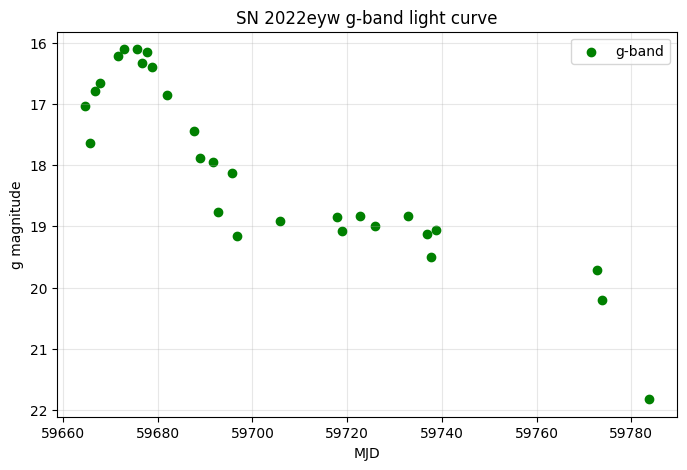

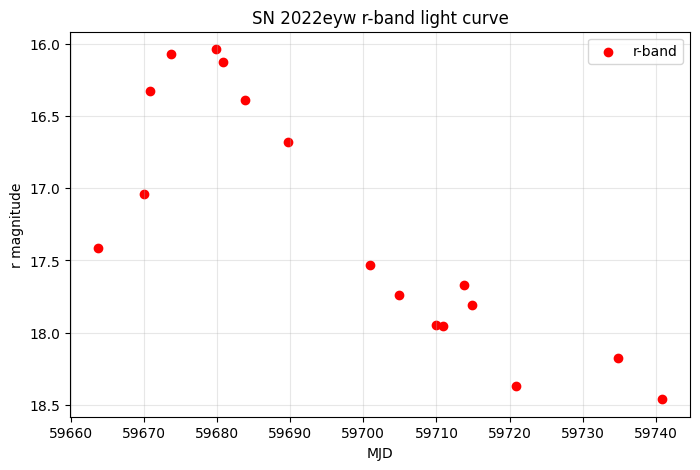

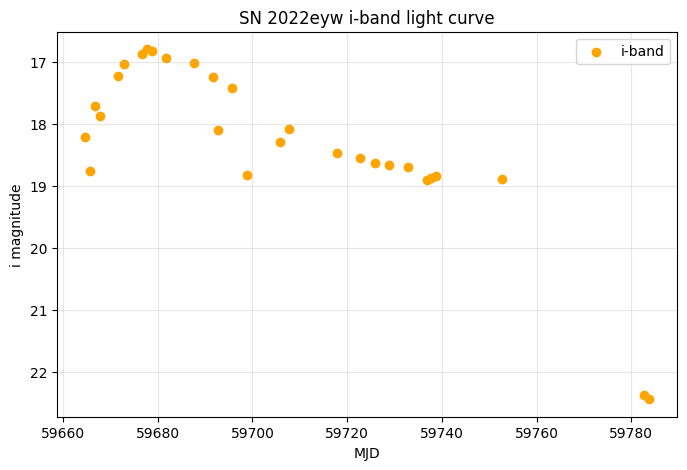

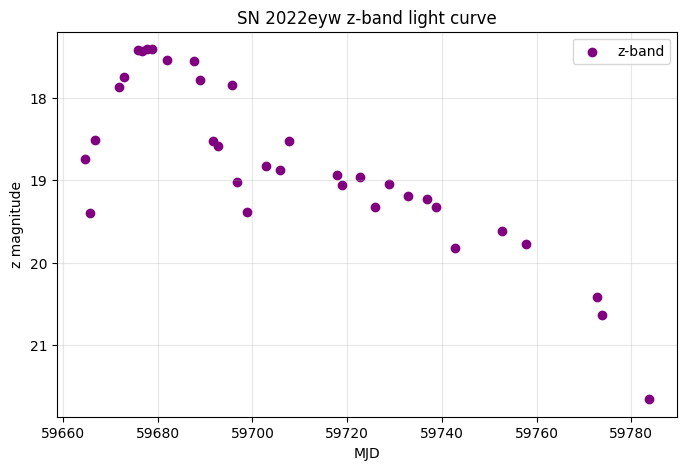

In [ ]:
import matplotlib.pyplot as plt

# individual panels
for flt, color in zip(["g","r","i","z"], ["green","red","orange","purple"]):
    if flt not in all_results:
        continue
    df = all_results[flt]
    plt.figure(figsize=(8,5))
    plt.scatter(df["MJD"], df["mag"], color=color, label=f"{flt}-band")
    plt.gca().invert_yaxis()
    plt.xlabel("MJD")
    plt.ylabel(f"{flt} magnitude")
    plt.title(f"SN 2022eyw {flt}-band light curve")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig(f"SN2022eyw_{flt}_lc.png", dpi=200, bbox_inches="tight")
    plt.show()


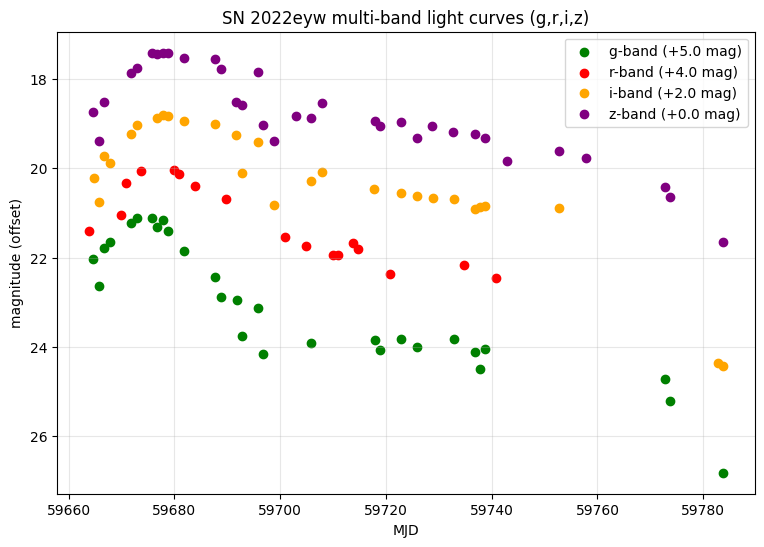

In [ ]:
offsets = {"g":5.0, "r":4.0, "i":2.0, "z":0.0}  # g lowest, z highest
colors  = {"g":"green", "r":"red", "i":"orange", "z":"purple"}

plt.figure(figsize=(9,6))
for flt in ["g","r","i","z"]:
    if flt not in all_results:
        continue
    df = all_results[flt]
    off = offsets[flt]
    plt.scatter(df["MJD"], df["mag"] + off,
                color=colors[flt], label=f"{flt}-band (+{off:.1f} mag)")

plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("magnitude (offset)")
plt.title("SN 2022eyw multi-band light curves (g,r,i,z)")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("SN2022eyw_griz_offset.png", dpi=200, bbox_inches="tight")
plt.show()


***Arnet's Model***

In [2]:
# 1. Clone SNAP
!git clone https://github.com/niyuanqi/SNAP.git

import sys, os

# 2. Put ANALYSIS directory itself on the path (not just SNAP)
sys.path.insert(0, "/content/SNAP/Analysis")
sys.path.insert(0, "/content/SNAP")   # keep this too

# 3. Now import
from LCFitting import ArnettIntercept, ArnettMejE, ArnettFit


fatal: destination path 'SNAP' already exists and is not an empty directory.


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (LCFitting.py, line 77)

In [ ]:
#################################################################
# Name:     ArnettFit.py                                        #
# Author:   Yuan Qi Ni                                          #
# Date:     Apr. 26, 2018                                       #
# Function: Program constructs UVOIR light curve using SNooPy   #
#           SN1a template. Fits using Arnett model.             #
#           Update ObjData.py first.                            #
#################################################################

#essential modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as integrate
from scipy.optimize import leastsq
from snpy import *

#essential files
from SNAP.Analysis.LCRoutines import*
from SNAP.Analysis.Cosmology import*
from SNAP.Analysis.LCFitting import*
from ObjData import *

plot = True #plot polynomial fits to light curves
print "Loading SN File"
s = get_sn(sn_file)
#don't plot fit
s.replot = 0
#fit SN
s.choose_model("EBV_model2", stype='st')
s.fit(band)

print "Bolometric integration range (angstrom):", 3663.0/(1+s.z), 8750/(1+s.z)
#calculate Bolometric Luminosity
n=500 #use some monte carlo to get bolometric luminosity error
sBs = []
dzs = np.random.normal(0,zerr,n)
for i in range(n):
    s.z = z+dzs[i]
    print i, s.z
    #luminosity distance
    dl = intDl(s.z)
    #distance modulus
    DM = 5.024*np.log10(dl/10)

    tB, sB, fB, lB = s.bolometric(['B','V','i'], method='SED',
                                  EBVhost=0, Rv=0, SED='H3',
                                  lam1=3663.0/(1+s.z),
                                  lam2=8750/(1+s.z),
                                  DM=DM,
                                  use_stretch=True)
    print len(sB)
    sBs.append(sB)
sBs = np.array(sBs)
sB = sBs.mean(axis=0)
sBerr = sBs.std(axis=0)

tB, sB, sBerr = LCcrop(tB, -20, 50, sB, M_err=sBerr)
#window in which to perform Arnett fit
tph1 = -10 #from -10 days to 15 days, this is the "photospheric phase"
tph2 = 15
tfit, sfit, sfiterr = LCcrop(tB, tph1, tph2, sB, M_err=sBerr)

#perform fit to find peak of function
fit, fit_err, params, params_err = LCpolyFit(tfit, -sfit, sfiterr, order=4, N=1000, plot=plot)
print params, params_err
tmax = -t0+params[0]
tmax_err = np.sqrt(np.square(t0err)+np.square(params_err[0]))

#Use monte carlo to find optimal parameters of MNi and MejEk
n=5000
p0 = 1.2 #initial guess for ejecta MejEk parameter
print ""
print "Performing Monte Carlo to find optimal MNi, and MejEk"
print "This takes a while, go for a walk."
MNi, MejEk, MNi_err, MejEk_err  = ArnettIntercept(tmax, -params[1], tmax_err, params_err[1], p0, n=n, nproc=4)
print "DONE!"

vej, vej_err = 11.0, 1.0
#break degeneracy in MejEk
Mej, Mej_err, Eej, Eej_err = ArnettMejE(MejEk,MejEk_err,vej*10**8,vej_err*10**8)
print ""
print "Nickel mass:", MNi, MNi_err, "Msun"
print "Ejecta mass-energy parameter:", MejEk, MejEk_err
print "Assumed ejecta velocity:", vej, vej_err, "km/s"
print "Ejecta mass:", Mej, Mej_err, "Msun"
print "Ejecta Ek:", Eej, Eej_err, "x10^51ergs"

t_arnett = np.arange(0.25,103.25,0.25)
L_arnett = ArnettFit(t_arnett, MNi, MejEk)
#plt.plot(t_arnett, L_arnett)
#plt.errorbar(tmax, Lmax, xerr=tmax_err, yerr=Lmax_err, fmt='r+')
#plt.show()
logL_arnett = np.log10(L_arnett)
print "Maximum luminosity (ergs/s):",max(L_arnett)

print "plotting peak fit"
#plot Arnett fit
#gotta get error of fit somehow
#plt.title('Arnett Fitted to UVOIR Bolometric Light Curve')
plt.errorbar(tB, np.log10(sB), yerr=sBerr/np.log(10)/sB, marker='o', c='g')
plt.plot(t_arnett+t0, logL_arnett, c='r')
#plt.errorbar(tB, sB, yerr=sBerr, marker='o', c='g')
#plt.plot(t_arnett, L_arnett, c='r')
plt.ylabel('$log_{10}(L)$ [erg/s]', fontsize = 14)
plt.xlabel('Time [rest-frame days]', fontsize = 14)
plt.xlim(-20,40)
plt.ylim(40.5,43.5)
#plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np

lc = pd.read_csv("/content/logL-bb_SN2022eyw_UBgVrRiz.txt",
                 delim_whitespace=True, header=None,
                 names=["JD","logL","elogL"])

# convert to linear luminosity
Lbol = 10**lc["logL"].values          # erg/s
Lerr = Lbol * np.log(10) * lc["elogL"].values

JD   = lc["JD"].values


/tmp/ipython-input-797816390.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc = pd.read_csv("/content/logL-bb_SN2022eyw_UBgVrRiz.txt",


In [4]:
t0 = 2459668.2   # example: set this to your B-max JD
z = 0.009
       # use actual redshift if non‑negligible

t_rest = (JD - t0) / (1.0 + z)   # rest-frame days since t0


In [5]:
# restrict to -20 to +50 days
mask = (t_rest > -20) & (t_rest < 50)
tB   = t_rest[mask]
LbolB = Lbol[mask]
LerrB = Lerr[mask]

# window for Arnett fit: -10 to +15 days
tph1, tph2 = -10.0, 15.0
m_ph = (tB >= tph1) & (tB <= tph2)
t_fit   = tB[m_ph]
L_fit   = LbolB[m_ph]
Lerr_fit = LerrB[m_ph]

imax = np.argmax(L_fit)
tmax     = t_fit[imax]
Lmax     = L_fit[imax]
tmax_err = 0.5          # days; refine later if needed
Lmax_err = Lerr_fit[imax]


In [6]:
from scipy.optimize import curve_fit

tau_Ni = 8.8
tau_Co = 111.3
eps_Ni = 3.9e10
eps_Co = 6.8e9
Msun   = 1.989e33

def arnett_lum(t, MNi, td):
    t = np.array(t, dtype=float)
    x = t / td
    phi = 1.0 - np.exp(-x**2)  # diffusion kernel approximation
    MNi_g = MNi * Msun
    term_radio = (eps_Ni * np.exp(-t/tau_Ni) +
                  eps_Co * (np.exp(-t/tau_Co) - np.exp(-t/tau_Ni)))
    return MNi_g * term_radio * phi

p0 = [0.3, 10.0]  # initial guess: 0.3 Msun, td=10d
sigma = np.where(Lerr_fit>0, Lerr_fit, np.max(Lerr_fit))

popt, pcov = curve_fit(
    arnett_lum, t_fit, L_fit,
    p0=p0, sigma=sigma, absolute_sigma=True, maxfev=10000
)

MNi_fit, td_fit = popt
MNi_err, td_err = np.sqrt(np.diag(pcov))

print(f"MNi = {MNi_fit:.3f} ± {MNi_err:.3f} Msun")
print(f"td  = {td_fit:.2f} ± {td_err:.2f} days")


MNi = 0.119 ± 0.005 Msun
td  = 5.55 ± 0.41 days


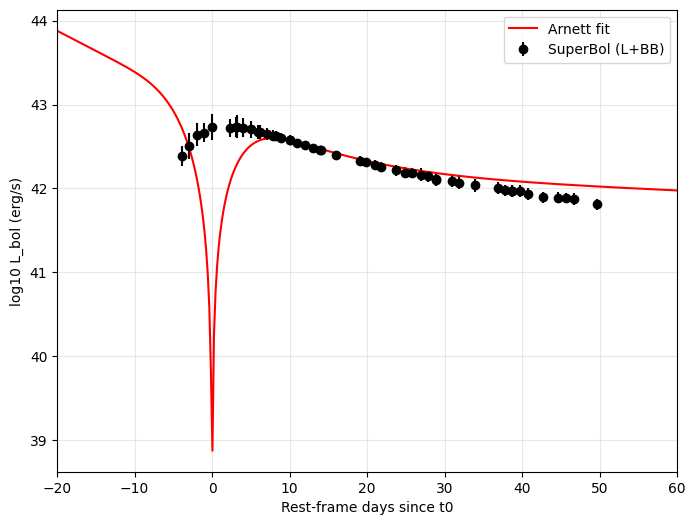

In [7]:
import matplotlib.pyplot as plt

t_model = np.linspace(-20, 60, 400)
L_model = arnett_lum(t_model, MNi_fit, td_fit)

plt.figure(figsize=(8,6))
plt.errorbar(tB, np.log10(LbolB), yerr=LerrB/(np.log(10)*LbolB),
             fmt='o', color='k', label='SuperBol (L+BB)')
plt.plot(t_model, np.log10(L_model), color='r', label='Arnett fit')
plt.xlabel("Rest-frame days since t0")
plt.ylabel("log10 L_bol (erg/s)")
plt.xlim(-20, 60)
plt.legend()
plt.grid(alpha=0.3)
plt.show()